### Read and set the data into list and dict, easier to manipulate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

inputFileName = "Data_Newsvendor.xlsx"
param_data = pd.read_excel(inputFileName, "Param", skiprows=0)
demand_data = pd.read_excel(inputFileName, "Demand", skiprows=0)

unitCost = param_data['Value'][0]
salesPrice = param_data['Value'][1]
liqPrice = param_data['Value'][2]

In [3]:
param_data

,Param,Value
0,UnitCost,5.0
1,SalesPrice,6.0
2,LiquidationPrice,2.0
3,nbScenarios,100.0
4,probaThreshold,0.2


In [4]:
demand_data

,Scenario,Demand
0,1,39
1,2,43
2,3,51
3,4,48
4,5,64
...,...,...
995,996,41
996,997,48
997,998,36
998,999,45


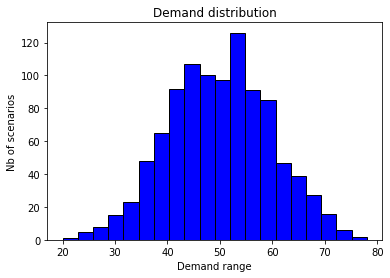

In [2]:
nbScenarios = int(param_data['Value'][3])
probaScenario = 1/float(nbScenarios)


#Display the demand
plt.hist((demand_data['Demand']), color = 'blue', edgecolor = 'black', bins = 20)

# Add labels
plt.title('Demand distribution')
plt.xlabel('Demand range')
plt.ylabel('Nb of scenarios')

plt.show()

### Create your linear program

In [11]:
from pulp import *

withChanceConstraint = 1 #=1 to use the chance constraint over soldOut
withCVaR = 0  #= 1 to compute CVaR and to limit it through a constraint
probaForCVaR = 0.1

prob = LpProblem("Newsvendor", LpMaximize)

purchaseVar = LpVariable("purchaseVar", cat="Continious")

salesVar = LpVariable.dicts("salesVar", (i for i in range(nbScenarios)), lowBound=0, cat='Continuous')
liqVar = LpVariable.dicts("liqVar", (i for i in range(nbScenarios)), lowBound=0, cat='Continuous')
revenueVar = LpVariable.dicts("revenueVar", (i for i in range(nbScenarios)), lowBound=0, cat='Continuous')
#Objective
prob += -unitCost*purchaseVar+probaScenario*lpSum([salesPrice*min(purchaseVar,demand_data['Demand'][i])+LiquidationPrice*max(0,purchaseVar-demand_data['Demand'][i]) for i in range(nbScenarios)])
print(prob)
#Constraints
for iScenario in range(nbScenarios):
    #Constraint maxSales
    prob += salesVar[iScenario]+liqVar[iScenario]<=purchaseVar
    #Constraints defining the liq and revenue variables
    prob += salesVar[iScenario]==min(purchaseVar,demand_data['Demand'][iScenario])
    prob += liqVar[iScenario]==max(0,purchaseVar-demand_data['Demand'][iScenario])
prob.writeLP("newsvendorProblem.lp", writeSOS=1, mip=1)
prob.solve()
print("Status:", LpStatus[prob.status])
print ("Objective = ", value(prob.objective))

varsDict = {}
for v in prob.variables():
    varsDict[v.name] = v.varValue
    #if v.varValue != 0.0 : print(v.name, "=", v.varValue)
print("Optimal purchase = %.2f"%(varsDict["Purchase"]))
if withCVaR :print("CVaR = %.2f"%(varsDict["CVaRVar"]))
revenueResults = []
for iScenario in range(nbScenarios):
    revenueResults.append(varsDict["Revenue_%d"%(iScenario)])
#Display the revenue distribution
plt.hist(revenueResults, color = 'blue', edgecolor = 'black', bins = 20)
# Add labels
plt.title('revenue distribution')
plt.xlabel('revenue range')
plt.ylabel('Nb of scenarios')
plt.show()


TypeError: '<' not supported between instances of 'int' and 'LpVariable'

In [10]:
from pulp import *

withChanceConstraint = 1 #=1 to use the chance constraint over soldOut
withCVaR = 0  #= 1 to compute CVaR and to limit it through a constraint
probaForCVaR = 0.1

prob = LpProblem("Newsvendor", LpMaximize)

purchaseVar = LpVariable("purchaseVar", cat="Continious")


salesVar = LpVariable.dicts("salesVar", (i for i in range(nbScenarios)), lowBound=0, cat='Continuous')
liqVar = LpVariable.dicts("liqVar", (i for i in range(nbScenarios)), lowBound=0, cat='Continuous')
revenueVar = LpVariable.dicts("revenueVar", (i for i in range(nbScenarios)), lowBound=0, cat='Continuous')



#Objective
prob += probaScenario*lpSum([salesPrice*min(purchaseVar,demand_data['Demand'][i])+LiquidationPrice*max(0,purchaseVar-demand_data['Demand'][i]) for i in range(nbScenarios)])-unitCost*purchaseVar

print(prob)

TypeError: '<' not supported between instances of 'int' and 'LpVariable'